In [1]:
using JLD

INFO: Recompiling stale cache file /home/karel/.julia/lib/v0.6/LegacyStrings.ji for module LegacyStrings.
INFO: Recompiling stale cache file /home/karel/.julia/lib/v0.6/JLD.ji for module JLD.


In [2]:
nomis="../JLDFiles/TrabajandoKyKTilde/LFP_Promedio_est_con5.jld"

"../JLDFiles/TrabajandoKyKTilde/LFP_Promedio_est_con5.jld"

In [4]:
datos=load(nomis)

Dict{String,Any} with 12 entries:
  "KTT_KInv"         => [0.710605 0.155257 … -5.54059e-5 -2.93594e-5; 0.168929 …
  "latencia"         => 27
  "kCSDCorrecta"     => [0.0 2.02285 … -0.0720208 -0.394232; 1.17 2.77874 … -0.…
  "final"            => 1072
  "KTilde"           => [28.1263 33.76 … 1.19496 0.892065; 27.0489 36.982 … 1.2…
  "Canalesrespuesta" => Set(Array{Int64,1}[[33, 57], [25, 39], [33, 56], [30, 4…
  "retrazo"          => 90
  "freq"             => 17.8555
  "LFPSaturados"     => [4125.0 7.38525 … 20.813 6.71387; 22.1558 18.7988 … 11.…
  "Nota"             => "Usamos las siguientes B y BT para obtener las Ks: Bcer…
  "K"                => [7521.15 3890.8 … 1624.32 1592.52; 3890.8 8100.04 … 165…
  "CanalesSaturados" => Set(Array{Int64,1}[[11, 63], [41, 46], [6, 37], [44, 23…

In [6]:
lfp=datos["LFPSaturados"];

In [9]:
(ancho,alto,tmax)=size(lfp)
aa=alto*ancho

4096

In [10]:
lfpplano=reshape(lfp, (aa,tmax))

### Primero los centramos

lfpmasajeado=zeros(lfpplano)
promedios=zeros(aa)
mean!(promedios,lfpplano)
for j=1:aa
    lfpmasajeado[j,:]=lfpplano[j,:]-promedios[j]
end


In [11]:
correlaciones=zeros(aa,aa)
vcdot(x,y) = dot(vec(x), vec(y))

vcdot (generic function with 1 method)

In [16]:
@time for j=1:aa,k=1:aa
    if(mod(j,64)==64); println("llevamos", j); end
    correlaciones[k,j]=vcdot(lfpplano[k,:], lfpplano[j,:])
end
    
#correlaciones/=tmax
#writedlm( "test.dat" ,correlaciones)



540.364664 seconds (130.05 M allocations: 297.688 GiB, 2.58% gc time)


In [17]:
correlaciones/=tmax
writedlm( "test.dat" ,correlaciones)

In [18]:
using PyPlot

INFO: Recompiling stale cache file /home/karel/.julia/lib/v0.6/MacroTools.ji for module MacroTools.
INFO: Recompiling stale cache file /home/karel/.julia/lib/v0.6/PyCall.ji for module PyCall.
INFO: Recompiling stale cache file /home/karel/.julia/lib/v0.6/PyPlot.ji for module PyPlot.


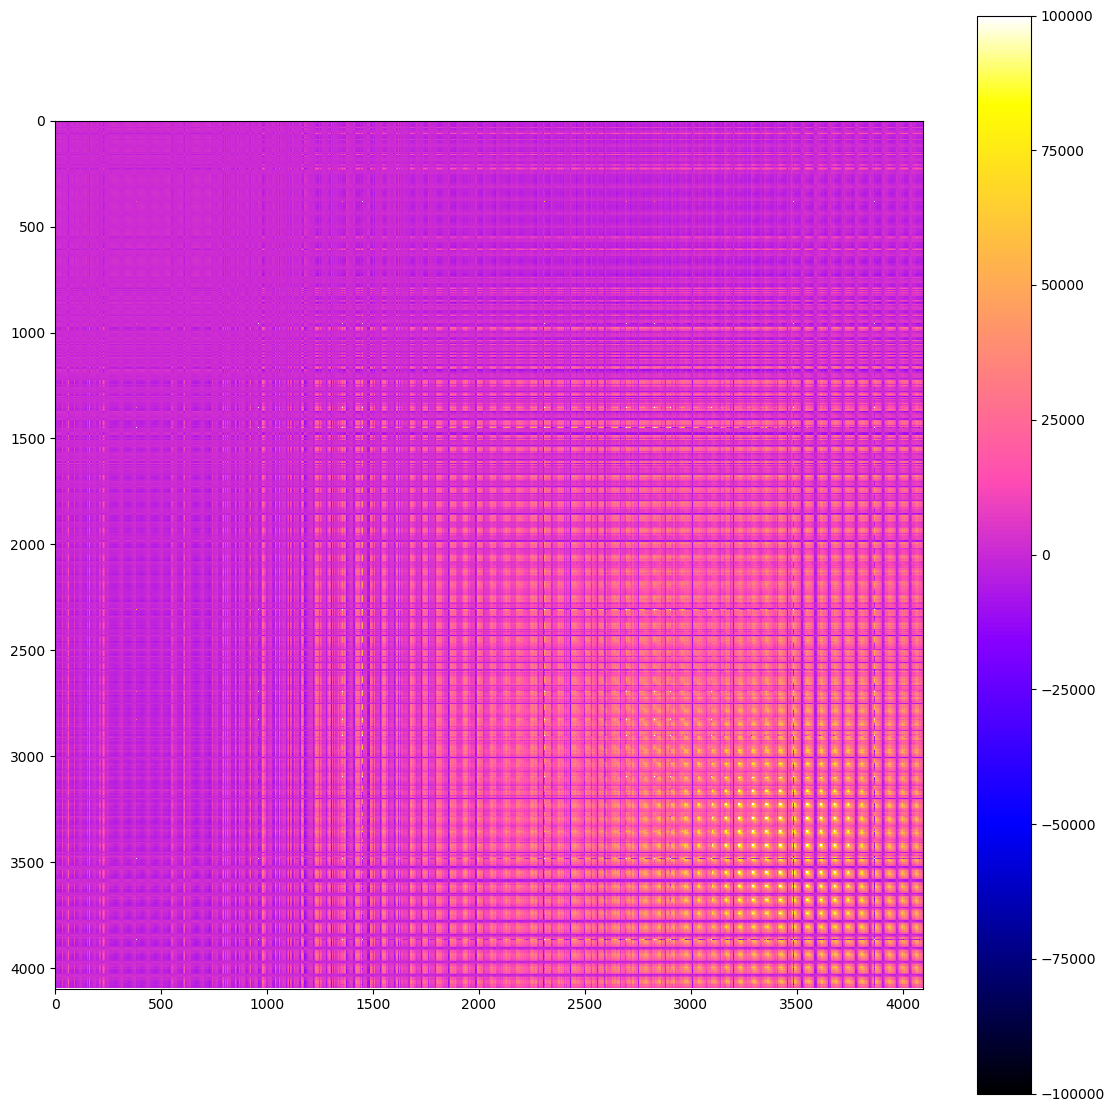

PyObject <matplotlib.colorbar.Colorbar object at 0x7f5b1771b2b0>

In [35]:
figurera=figure(figsize=(14,14))
vm=10^5
imshow(correlaciones, cmap="gnuplot2",vmin=-vm,vmax=vm)
cb=colorbar()
#savefig("tuabuela.png",dpi=90)

In [32]:
extrema(correlaciones)

(-1.700731658935547e7, 1.7015625e7)

Stacktrace:
 [1] depwarn(::

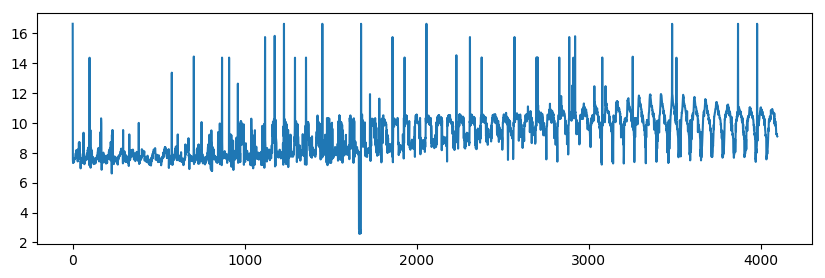

String, ::Symbol) at ./deprecated.jl:70
 [2] log(::Array{Float64,1}) at ./deprecated.jl:57
 [3] include_string(::Module, ::String, ::String) at /home/karel/.julia/v0.6/Compat/src/Compat.jl:174
 [4] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/karel/.julia/v0.6/IJulia/src/execute_request.jl:154
 [5] (::Compat.#inner#16{Array{Any,1},IJulia.#execute_request,Tuple{ZMQ.Socket,IJulia.Msg}})() at /home/karel/.julia/v0.6/Compat/src/Compat.jl:496
 [6] eventloop(::ZMQ.Socket) at /home/karel/.julia/v0.6/IJulia/src/eventloop.jl:8
 [7] (::IJulia.##14#17)() at ./task.jl:335
while loading In[40], in expression starting on line 2


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5b3ba1c160>

In [40]:
figure(figsize=(10,3))
plot(1:4096, log(diag(correlaciones)))

In [42]:
using MultivariateStats

INFO: Precompiling module MultivariateStats.


In [43]:
canales=datos["Canalesrespuesta"]

Set(Array{Int64,1}[[33, 57], [25, 39], [33, 56], [30, 48], [27, 49], [19, 34], [30, 57], [32, 43], [33, 50], [17, 41]  …  [25, 43], [21, 41], [29, 38], [30, 45], [24, 53], [16, 38], [29, 48], [32, 52], [30, 46], [30, 40]])

k=length(canales)

In [49]:
mica=MultivariateStats.ICA

MultivariateStats.ICA

In [64]:
size(lfpmasajeado)

(4096, 1163)

In [66]:
lfpforica=transpose(lfpmasajeado);

In [67]:
tuabuela=fit(mica, lfpmasajeado,k,mean=0)

MultivariateStats.ICA(Float64[], [0.0 0.0 … 0.0 0.0; 8.03442e-5 -0.00100926 … 9.26928e-5 0.000826237; … ; 0.000901474 -0.000408653 … -0.00199829 -0.000347554; -5.00397e-5 0.000151584 … -6.6927e-5 0.000751096])

In [68]:
heytu=transform(tuabuela,lfpmasajeado)

359×1163 Array{Float64,2}:
  1.65905     1.64971    -0.142608   …   0.609768    0.400382     0.338665 
  0.257816   -0.528341    0.451252       0.47323     0.110594     0.0786236
  0.245116    0.65419    -0.156491       1.97705     1.1055       0.158708 
 -0.25792     0.302536    1.29108       -1.53199    -1.94086      0.092799 
 -0.490118   -1.29659    -0.825496      -0.491155    1.77381      0.711756 
  1.65999     0.428793   -0.382628   …   0.385773    1.11871      0.669733 
  0.766975   -1.20079    -0.682957      -0.714417   -0.248254    -1.07413  
 -1.14283     0.0554703  -0.074121       0.185443    1.07366     -0.895101 
  0.307925    0.0413247  -0.597054       0.483451   -0.109335     0.0358987
  0.32694    -0.235699    0.365798      -0.300192   -3.00623     -1.43856  
  0.0464543   0.0293281  -0.15128    …   0.690422   -0.739641    -0.0376311
 -0.283383    0.0220099   2.02251       -0.246852   -1.00318     -0.56171  
 -0.26402    -2.01512     0.961288      -0.902406    0.022375

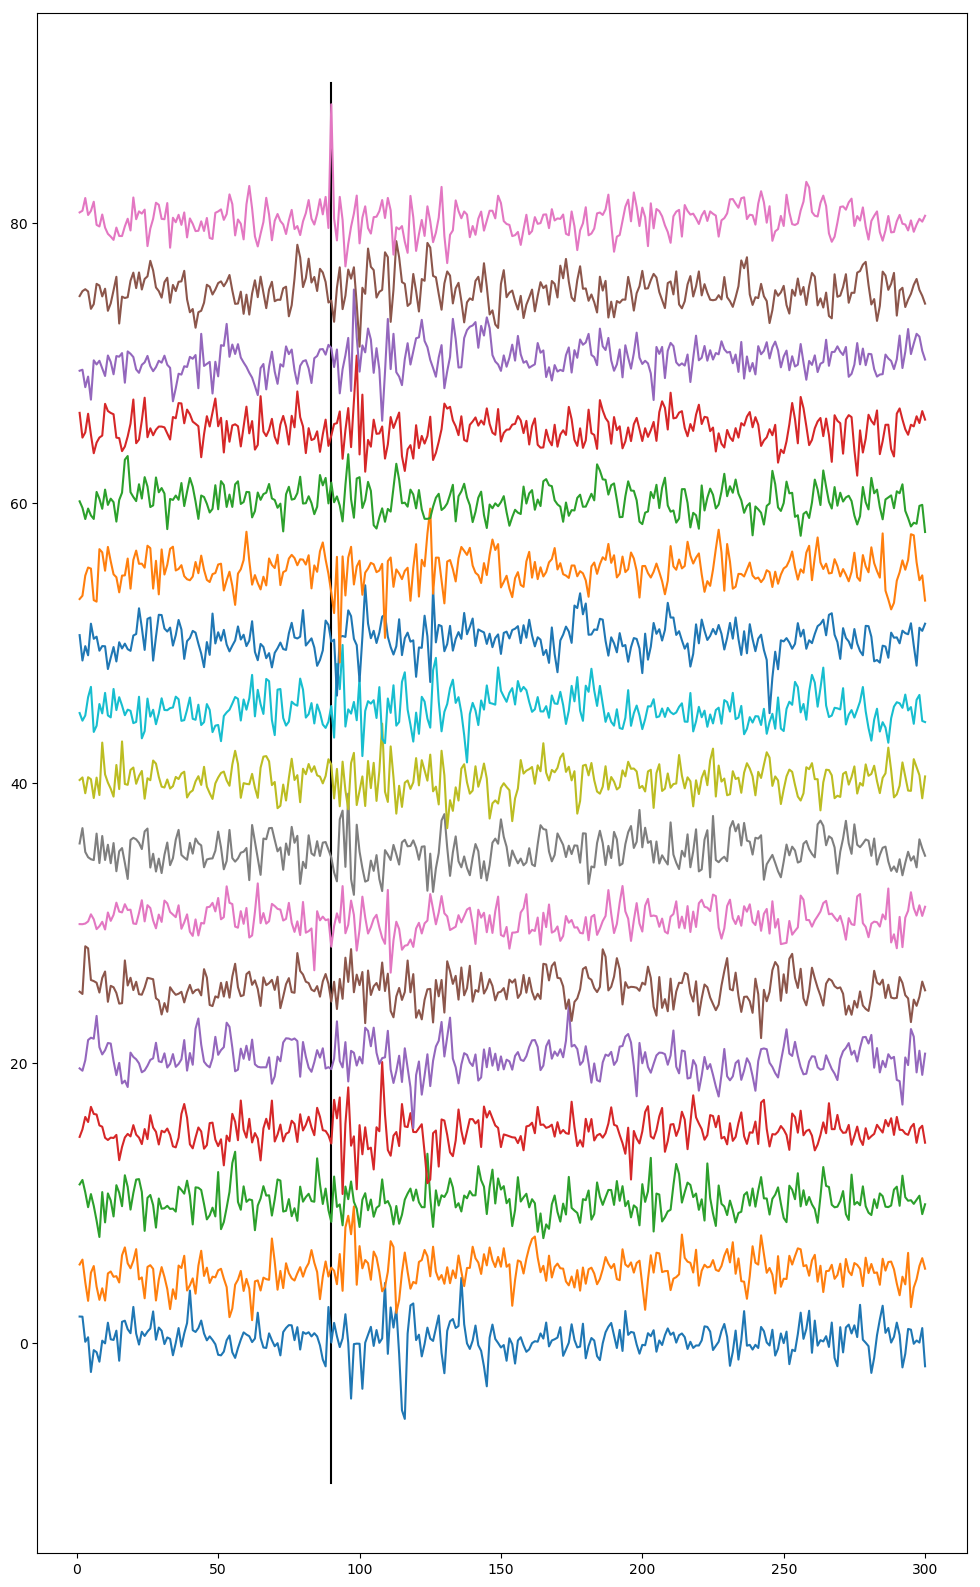

In [69]:
figura=figure(figsize=(12,20))

rango=1:300

plot([90,90],[-10,90], color="black")

for l=1:20:340
    plot(rango,heytu[l,rango]+l/4)
end


In [63]:
datos["retrazo"]

90